In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_r.csv').drop('average',axis=1)

In [25]:
df.columns

Index(['coordinate_x', 'coordinate_y', 'decoration_condition', 'deed',
       'elevator', 'facility0', 'facility1', 'facility2', 'facility3',
       'facility4', 'facility5', 'level', 'total', 'framework', 'house_term',
       'ownership', 'price', 'purpose', 'apt', 'lift', 'district', 'rights',
       'scale', 'structure', 'bath', 'kitchen', 'room', 'saloon'],
      dtype='object')

In [26]:
mean = np.mean(df['price'])
print("Mean of price: ", mean)
std = np.std(df['price'])
print("Standard deviation of target value: ", std)
min = np.min(df['price'])
max = np.max(df['price'])
print("Range of target value: [", min, "-",max ,"]")

Mean of price:  4890881.105033356
Standard deviation of target value:  3755660.194372619
Range of target value: [ 390000 - 100000000 ]


<AxesSubplot:xlabel='price', ylabel='Density'>

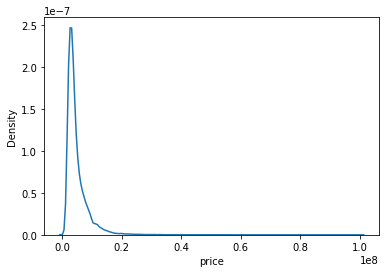

In [27]:
sns.kdeplot(df['price'])

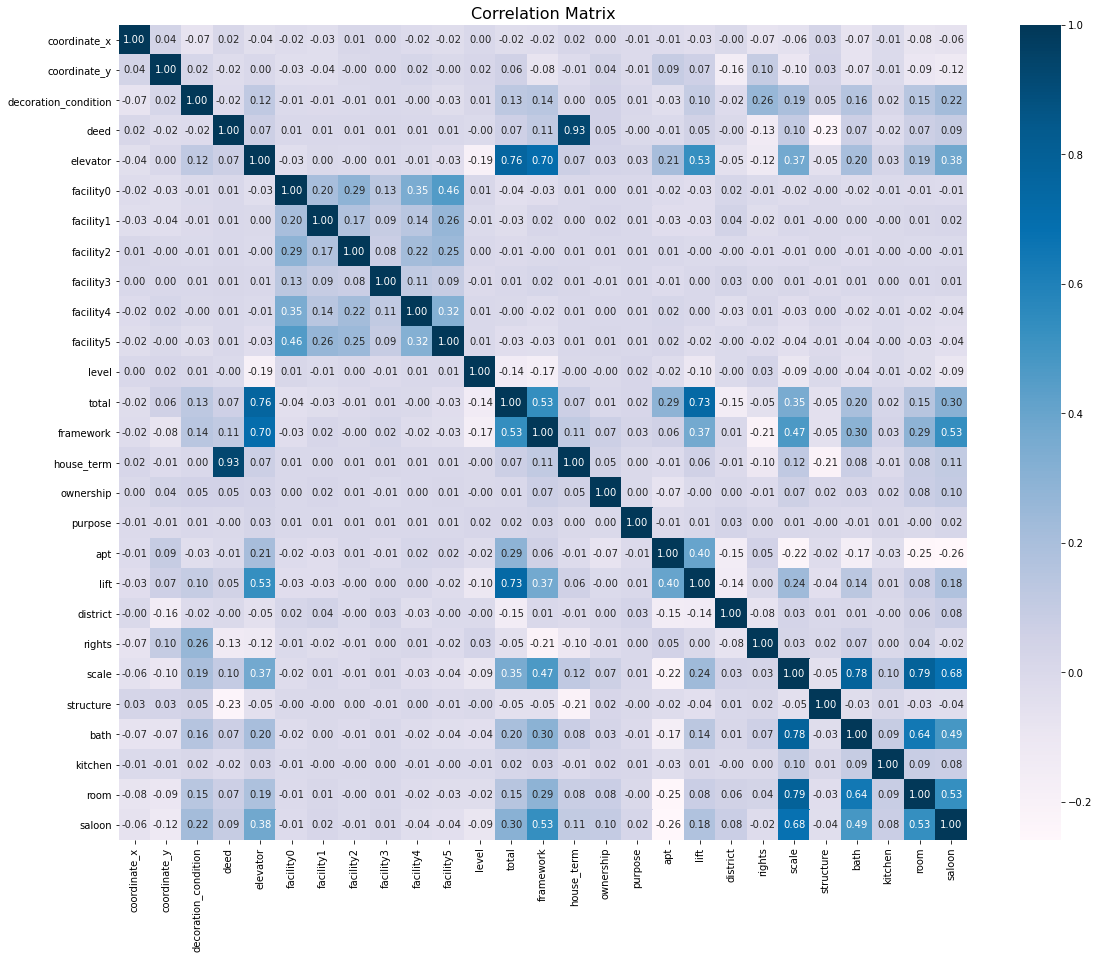

In [28]:
f = plt.figure(figsize=(19, 15))
# plt.matshow(df.corr(), fignum=f.number)
# plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
tmp=df.drop('price', axis=1)
sns.heatmap(tmp.corr(), annot=True, fmt='.2f', cmap='PuBu')
plt.title('Correlation Matrix', fontsize=16);

In [6]:
colList = []
meanList = []
stdList = []
rangeList = []
corList = []
corListAbso = []
for col in df.columns:
    colList.append(col)

    mean=round(np.mean(df[col]),3)
    meanList.append(mean)

    std = round(np.std(df[col]),3)
    stdList.append(std)

    min = round(np.min(df[col]),3)
    max = round(np.max(df[col]),3)
    range = "["+ str(min)+ ","+str(max)+"]"
    rangeList.append(range)

    correlation = round(df['price'].corr(df[col]),10)
    corList.append(correlation)
    corListAbso.append(abs(correlation))

info_frame = pd.DataFrame(({'feature name': colList,
                   'mean': meanList,
                   'standard deviation': stdList,
                   'range': rangeList,
                   'correlation': corList,
                   'Absolute value of correlation': corListAbso}))
info_frame.set_index('feature name', inplace = True)
info_frame=info_frame.sort_values('correlation')
print(info_frame.loc[(info_frame['Absolute value of correlation'] >= 0.2)].index.tolist())
# print(info_frame)

['decoration_condition', 'lift', 'framework', 'elevator', 'saloon', 'total', 'room', 'bath', 'scale', 'price']


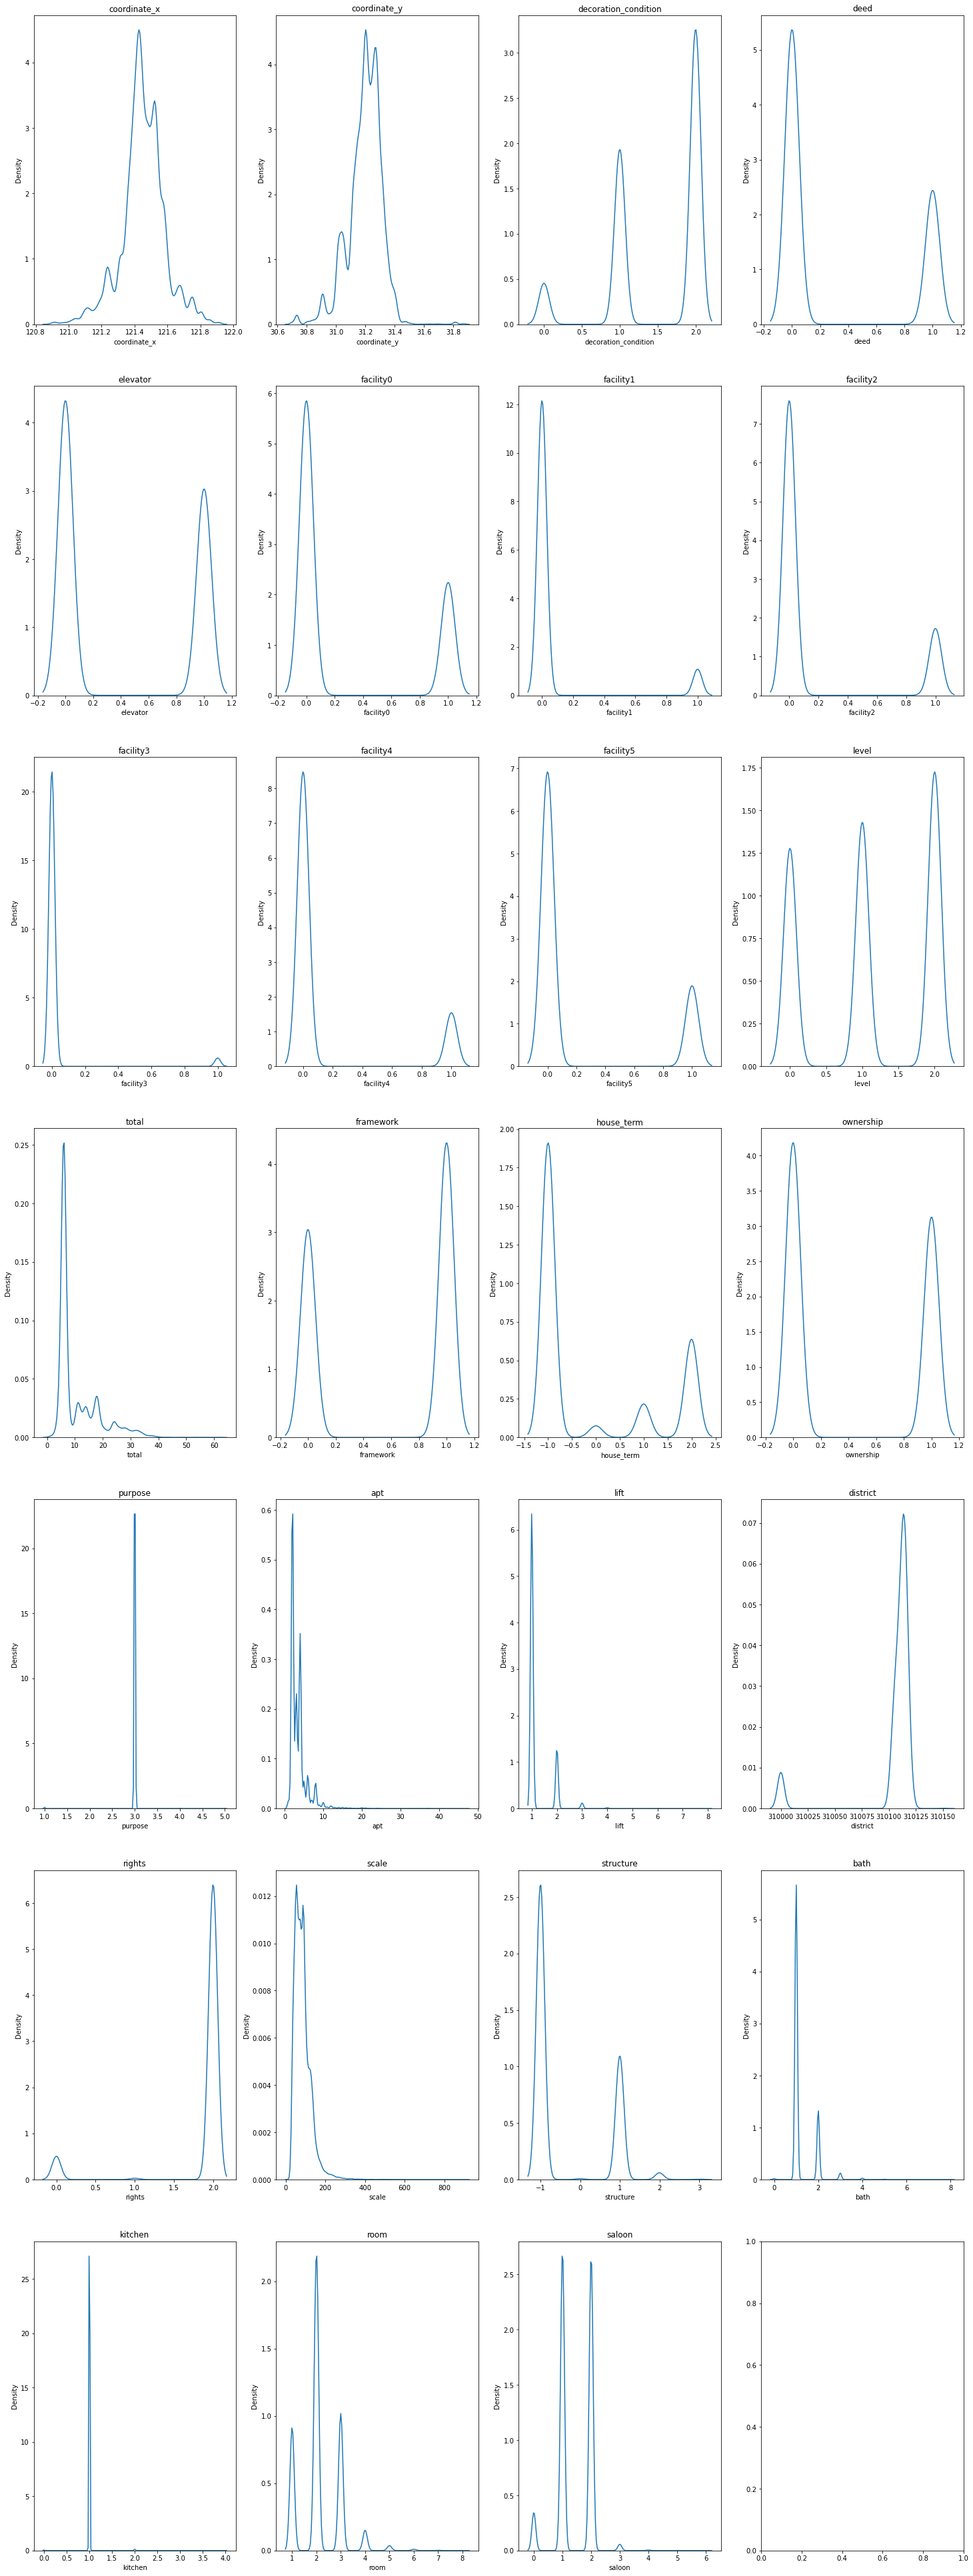

In [30]:
fig, axes = plt.subplots(7, 4,figsize=(25,70))
i,j = 0,0

for col in tmp.columns:
    sns.kdeplot(tmp[col], ax=axes[j,i])
    axes[j,i].title.set_text(col)
    i = i+1
    if i > 3 :
        i = 0
        j = j+1